Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 30107626.13it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 890304.30it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 7993365.03it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4542329.22it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Epoch [1/5], Step [100/938], Loss: 0.2451
Epoch [1/5], Step [200/938], Loss: 0.1357
Epoch [1/5], Step [300/938], Loss: 0.1011
Epoch [1/5], Step [400/938], Loss: 0.1696
Epoch [1/5], Step [500/938], Loss: 0.1067
Epoch [1/5], Step [600/938], Loss: 0.2918
Epoch [1/5], Step [700/938], Loss: 0.1436
Epoch [1/5], Step [800/938], Loss: 0.2446
Epoch [1/5], Step [900/938], Loss: 0.2010
Epoch [2/5], Step [100/938], Loss: 0.1178
Epoch [2/5], Step [200/938], Loss: 0.0604
Epoch [2/5], Step [300/938], Loss: 0.0480
Epoch [2/5], Step [400/938], Loss: 0.0547
Epoch [2/5], Step [500/938], Loss: 0.0527
Epoch [2/5], Step [600/938], Loss: 0.1069
Epoch [2/5], Step [700/938], Loss: 0.0948
Epoch [2/5], Step [800/938], Loss: 0.1357
Epoch [2/5], Step [900/938], Loss: 0.0765
Epoch [3/5], Step [100/938], Loss: 0.0324
Epoch [3/5], Step [200/938], Loss: 0.1001
Epoch [3/5], Step [300/938], Loss: 0.0089
Epoch [3/5], Step [400/938], Loss: 0.0169
Epoch [3/5], Step [500/938], Loss: 0.0208
Epoch [3/5], Step [600/938], Loss:

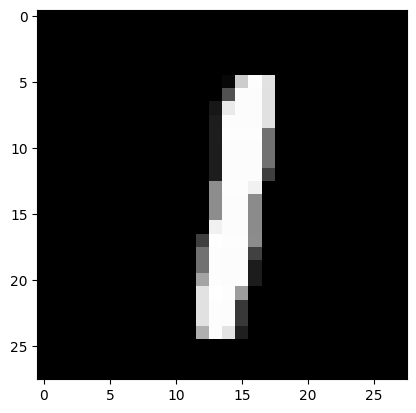

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Normalize the data
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = SimpleNN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}"
            )

# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data, targets in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    print(
        f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%"
    )

plt.title(predicted[0].item())
plt.imshow(data[0].view(28, 28).numpy(), cmap="gray")
plt.show()

In [10]:
from ipysketch_lite import Sketch
import numpy as np

sketch = Sketch(width=28, height=28)

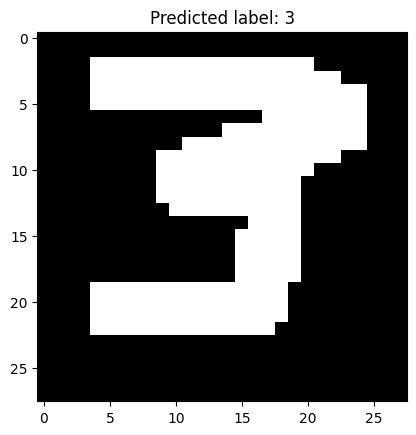

In [27]:
mysketch = sketch.get_output_array()
out = np.sum(mysketch, axis=2) > 0

# Make a prediction with the sketch
with torch.no_grad():
    tensor = torch.tensor(out, dtype=torch.float32).view(1, 28, 28)
    outputs = model(tensor)
    _, predicted = torch.max(outputs.data, 1)

plt.title(f"Predicted label: {predicted[0].item()}")
plt.imshow(out, cmap="gray")
plt.show()